# Hyperparameter on MNIST 

#### base code from : https://keras.io/examples/mnist_mlp/

### Import Libraries

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy

Using TensorFlow backend.


### Split train-test data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
x_train = x_train[0:6000]
y_train = y_train[0:6000]

x_test = x_test[0:1000]
y_test = y_test[0:1000]

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

6000 train samples
1000 test samples


### Convert class vectors to binary class matrices

In [5]:
num_classes = 10
batch_size = 128
epochs = 20

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Hyper-parameter: Hidden-Layer

#### 1 hidden-layer

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 8s 1ms/step - loss: 0.6791 - acc: 0.7903 - val_loss: 0.3757 - val_acc: 0.8880
Epoch 2/20
6000/6000 [==============================] - 1s 120us/step - loss: 0.2686 - acc: 0.9188 - val_loss: 0.3317 - val_acc: 0.8880
Epoch 3/20
6000/6000 [==============================] - 1s 125us/step - loss: 0.1777 - acc: 0.9493 - val_loss: 0.2699 - val_acc: 0.9090
Epoch 4/20
6000/6000 [==============================] - 1s 113us/step - loss: 0.1278 - acc: 0.9603 - val_loss: 0.2120 - val_acc: 0.9350
Epoch 5/20
6000/6000 [==============================] - 1s 112us/step - loss: 0.0951 - acc: 0.9717 - val_loss: 0.2476 - val_acc: 0.9110
Epoch 6/20
6000/6000 [=================

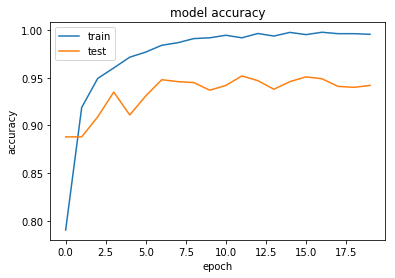

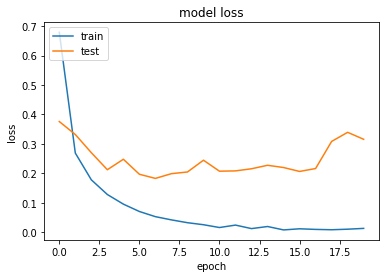

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### 3 hidden-layer

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 2s 378us/step - loss: 0.8710 - acc: 0.7127 - val_loss: 0.4199 - val_acc: 0.8700
Epoch 2/20
6000/6000 [==============================] - 1s 198us/step - loss: 0.3194 - acc: 0.9025 - val_loss: 0.3025 - val_acc: 0.8990: 0s - loss: 0.3359 - acc: 0
Epoch 3/20
6000/6000 [==============================] - 1s 187us/step - loss: 0.2165 - acc: 0.9382 - val_loss: 0.2993 - val_acc: 0.9050
Epoch 4/20
6000/6000 [==============================] - 1s 175us/step - loss: 0.1525 - acc: 0.9540 - val_loss: 0.2097 - val_acc: 0.9310
Epoch 5/20
6000/6000 [==============================] - ETA: 0s - loss: 0.1123 - acc: 0.967 - 1s 177us/step - loss: 0.1126 - acc: 0.9677 - val_loss: 0.3139 - val_acc: 0.9190
Epoch 6/20
6000/6000 [==============================] - 1s 177us/step - loss: 0.0978 - acc: 0.9713 - val_loss: 0.2083 - val_acc: 0.9400
Epoch 7/20
6000/6000 [==============================] - 1s 179us/step 

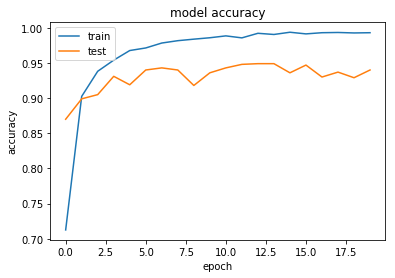

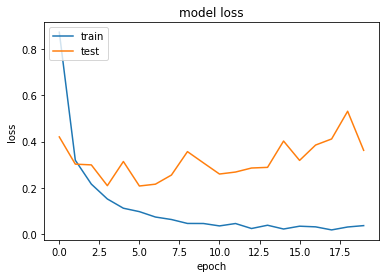

In [7]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### 5 hidden-layer

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 2s 372us/step - loss: 1.3917 - acc: 0.5318 - val_loss: 0.6760 - val_acc: 0.7770
Epoch 2/20
6000/6000 [==============================] - 1s 213us/step - loss: 0.4725 - acc: 0.8578 - val_loss: 0.3085 - val_acc: 0.9100
Epoch 3/20
6000/6000 [==============================] - 1s 213us/step - loss: 0.2956 - acc: 0.9160 - val_loss: 0.2639 - val_acc: 0.9200
Epoch 4/20
6000/6000 [==============================] - 1s 210us/step - loss: 0.2155 - acc: 0.9373 - val_loss: 0.2788 - val_acc: 0.9190
Epoch 5/20
6000/6000 [==============================] - 1s 210us/step - loss: 0.1654 - acc: 0.9568 - val_loss: 0.2467 - val_acc: 0.9320
Epoch 6/20
6000/6000 [==============================] - 1s 219us/step - loss: 0.1387 - acc: 0.9617 - val_loss: 0.2599 - val_acc: 0.9290
Epoch 7/20
6000/6000 [==============================] - 1s 211us/step - loss: 0.1133 - acc: 0.9708 - val_loss: 0.2817 - val_acc: 0.9330


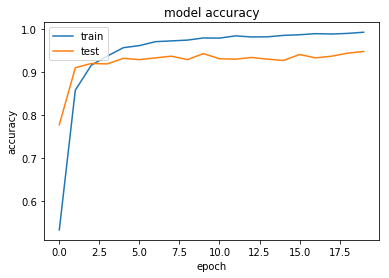

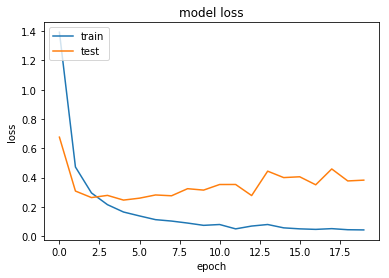

In [8]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 8 hidden-layer

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 3s 526us/step - loss: 1.9874 - acc: 0.2500 - val_loss: 1.3620 - val_acc: 0.4500
Epoch 2/20
6000/6000 [==============================] - 2s 286us/step - loss: 1.0355 - acc: 0.6135 - val_loss: 0.6599 - val_acc: 0.7480
Epoch 3/20
6000/6000 [==============================] - 2s 290us/step - loss: 0.5589 - acc: 0.8343 - val_loss: 0.4364 - val_acc: 0.8840
Epoch 4/20
6000/6000 [==============================] - 2s 291us/step - loss: 0.3353 - acc: 0.9123 - val_loss: 0.5045 - val_acc: 0.8870
Epoch 5/20
6000/6000 [==============================] - 2s 294us/step - loss: 0.2558 - acc: 0.9382 - val_loss: 0.3612 - val_acc: 0.9080
Epoch 6/20
6000/6000 [==============================] - 2s 287us/step - loss: 0.2052 - acc: 0.9492 - val_loss: 0.3644 - val_acc: 0.9230
Epoch 7/20
6000/6000 [==============================] - 2s 291us/step - loss: 0.1962 - acc: 0.9540 - val_loss: 0.3336 - val_acc: 0.9280


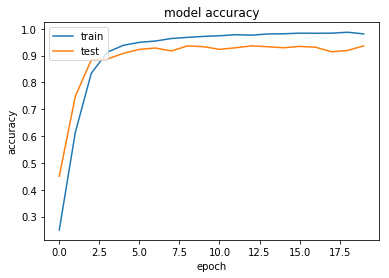

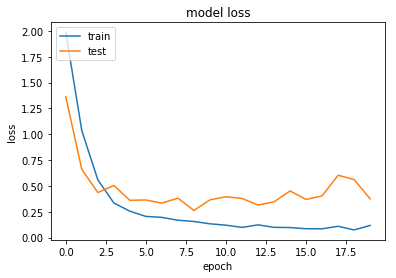

In [9]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Hyper-parameter: Node

#### 64

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 3s 511us/step - loss: 2.1798 - acc: 0.1828 - val_loss: 2.0171 - val_acc: 0.2970
Epoch 2/20
6000/6000 [==============================] - 1s 115us/step - loss: 1.8548 - acc: 0.3197 - val_loss: 1.7027 - val_acc: 0.3570
Epoch 3/20
6000/6000 [==============================] - 1s 130us/step - loss: 1.5901 - acc: 0.3763 - val_loss: 1.4212 - val_acc: 0.4540
Epoch 4/20
6000/6000 [==============================] - 1s 119us/step - loss: 1.3737 - acc: 0.4393 - val_loss: 1.2005 - val_acc: 0.5630
Epoch 5/20
6000/6000 [==============================] - 1s 127us/step - loss: 1.1956 - acc: 0.5402 - val_loss: 1.0516 - val_acc: 0.6180
Epoch 6/20
6000/6000 [==============================] - 1s 118us/step - loss: 1.0355 - acc: 0.6017 - val_loss: 0.9573 - val_acc: 0.6520
Epoch 7/20
6000/6000 [==============================] - 1s 117us/step - loss: 0.9279 - acc: 0.6555 - val_loss: 0.8174 - val_acc: 0.7660


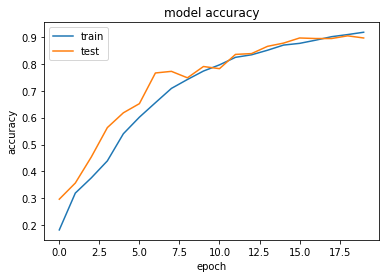

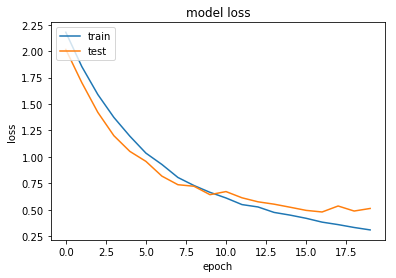

In [10]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 128

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 3s 423us/step - loss: 1.9834 - acc: 0.2475 - val_loss: 1.3949 - val_acc: 0.4560
Epoch 2/20
6000/6000 [==============================] - 1s 99us/step - loss: 1.2566 - acc: 0.5042 - val_loss: 0.8927 - val_acc: 0.6520
Epoch 3/20
6000/6000 [==============================] - 1s 98us/step - loss: 0.9195 - acc: 0.6520 - val_loss: 0.6999 - val_acc: 0.7080
Epoch 4/20
6000/6000 [==============================] - 1s 97us/step - loss: 0.6486 - acc: 0.7770 - val_loss: 0.4789 - val_acc: 0.8550
Epoch 5/20
6000/6000 [==============================] - 1s 98us/step - loss: 0.5237 - acc: 0.8323 - val_loss: 0.4165 - val_acc: 0.8660
Epoch 6/20
6000/6000 [==============================] - 1s 98us/step - loss: 0.4129 - acc: 0.8778 - val_loss: 0.3956 - val_acc: 0.8850
Epoch 7/20
6000/6000 [==============================] - 1s 100us/step - loss: 0.3630 - acc: 0.8968 - val_loss: 0.3310 - val_acc: 0.9040
Epoch

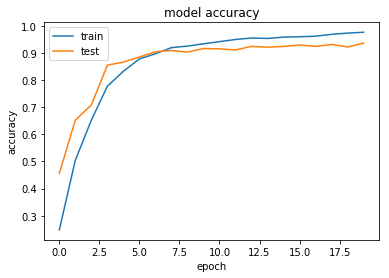

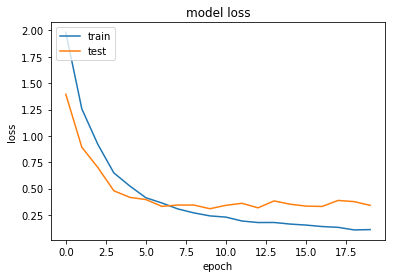

In [11]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 256

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 3s 447us/step - loss: 1.8726 - acc: 0.2768 - val_loss: 1.3127 - val_acc: 0.5610
Epoch 2/20
6000/6000 [==============================] - 1s 138us/step - loss: 1.0771 - acc: 0.5818 - val_loss: 0.8677 - val_acc: 0.7030
Epoch 3/20
6000/6000 [==============================] - 1s 137us/step - loss: 0.6413 - acc: 0.7790 - val_loss: 0.4729 - val_acc: 0.8710
Epoch 4/20
6000/6000 [==============================] - 1s 137us/step - loss: 0.4371 - acc: 0.8757 - val_loss: 0.4039 - val_acc: 0.8930
Epoch 5/20
6000/6000 [==============================] - 1s 120us/step - loss: 0.3216 - acc: 0.9150 - val_loss: 0.3252 - val_acc: 0.9060
Epoch 6/20
6000/6000 [==============================] - 1s 120us/step - loss: 0.2587 - acc: 0.9345 - val_loss: 0.3300 - val_acc: 0.9220
Epoch 7/20
6000/6000 [==============================] - 1s 119us/step - loss: 0.2036 - acc: 0.9472 - val_loss: 0.3423 - val_acc: 0.9180


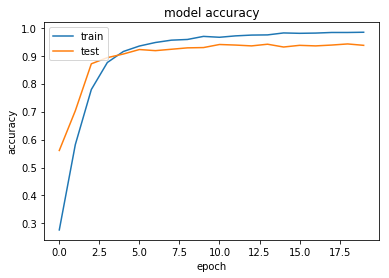

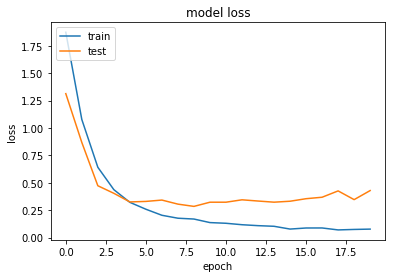

In [12]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 512

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 4s 675us/step - loss: 2.0626 - acc: 0.2135 - val_loss: 1.3800 - val_acc: 0.4100
Epoch 2/20
6000/6000 [==============================] - 2s 291us/step - loss: 1.0545 - acc: 0.6023 - val_loss: 0.7637 - val_acc: 0.7680
Epoch 3/20
6000/6000 [==============================] - 2s 292us/step - loss: 0.5170 - acc: 0.8343 - val_loss: 0.4389 - val_acc: 0.8870
Epoch 4/20
6000/6000 [==============================] - 2s 292us/step - loss: 0.3661 - acc: 0.9047 - val_loss: 0.4175 - val_acc: 0.8960
Epoch 5/20
6000/6000 [==============================] - 2s 291us/step - loss: 0.2675 - acc: 0.9347 - val_loss: 0.4116 - val_acc: 0.9070
Epoch 6/20
6000/6000 [==============================] - 2s 300us/step - loss: 0.2342 - acc: 0.9460 - val_loss: 0.3537 - val_acc: 0.9200
Epoch 7/20
6000/6000 [==============================] - 2s 295us/step - loss: 0.1789 - acc: 0.9568 - val_loss: 0.4200 - val_acc: 0.9140


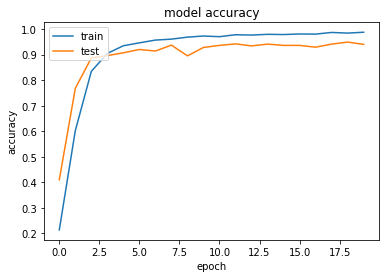

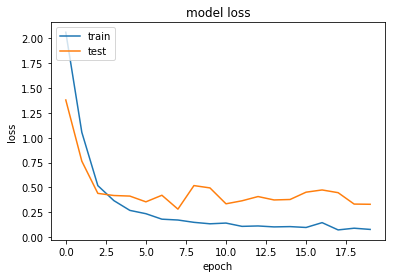

In [13]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Hyper-parameter: Activation Function

#### relu

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 5s 761us/step - loss: 2.1424 - acc: 0.1947 - val_loss: 1.4866 - val_acc: 0.4040
Epoch 2/20
6000/6000 [==============================] - 2s 292us/step - loss: 1.1236 - acc: 0.5522 - val_loss: 0.8149 - val_acc: 0.7320
Epoch 3/20
6000/6000 [==============================] - 2s 299us/step - loss: 0.6970 - acc: 0.7445 - val_loss: 0.5368 - val_acc: 0.8450
Epoch 4/20
6000/6000 [==============================] - 2s 309us/step - loss: 0.4262 - acc: 0.8847 - val_loss: 0.4151 - val_acc: 0.9010
Epoch 5/20
6000/6000 [==============================] - 2s 298us/step - loss: 0.2987 - acc: 0.9252 - val_loss: 0.4533 - val_acc: 0.8990
Epoch 6/20
6000/6000 [==============================] - 2s 295us/step - loss: 0.2523 - acc: 0.9388 - val_loss: 0.4734 - val_acc: 0.8950
Epoch 7/20
6000/6000 [==============================] - 2s 291us/step - loss: 0.1947 - acc: 0.9517 - val_loss: 0.3986 - val_acc: 0.9210


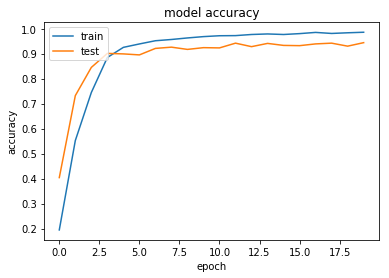

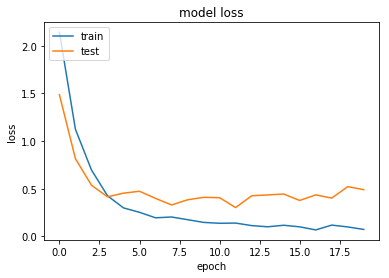

In [14]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### tanh

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 5s 793us/step - loss: 2.2524 - acc: 0.4657 - val_loss: 0.8801 - val_acc: 0.7030
Epoch 2/20
6000/6000 [==============================] - 2s 293us/step - loss: 0.8857 - acc: 0.7432 - val_loss: 1.1646 - val_acc: 0.6810
Epoch 3/20
6000/6000 [==============================] - 2s 293us/step - loss: 0.6548 - acc: 0.8237 - val_loss: 0.5928 - val_acc: 0.8180
Epoch 4/20
6000/6000 [==============================] - 2s 299us/step - loss: 0.5537 - acc: 0.8448 - val_loss: 0.6291 - val_acc: 0.8030
Epoch 5/20
6000/6000 [==============================] - 2s 300us/step - loss: 0.4411 - acc: 0.8758 - val_loss: 0.4330 - val_acc: 0.8850
Epoch 6/20
6000/6000 [==============================] - 2s 293us/step - loss: 0.3736 - acc: 0.8975 - val_loss: 0.4955 - val_acc: 0.8790
Epoch 7/20
6000/6000 [==============================] - 2s 293us/step - loss: 0.3304 - acc: 0.9080 - val_loss: 0.4353 - val_acc: 0.8820


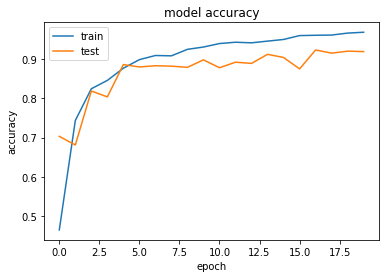

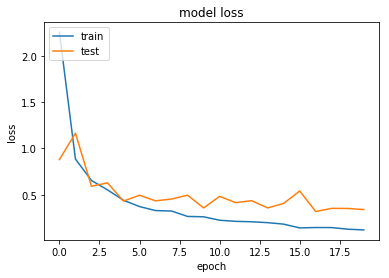

In [15]:
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### sigmoid

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 5s 770us/step - loss: 2.4338 - acc: 0.1065 - val_loss: 2.3244 - val_acc: 0.0890
Epoch 2/20
6000/6000 [==============================] - 2s 298us/step - loss: 2.3679 - acc: 0.1012 - val_loss: 2.3171 - val_acc: 0.1100
Epoch 3/20
6000/6000 [==============================] - 2s 306us/step - loss: 2.3479 - acc: 0.1040 - val_loss: 2.3152 - val_acc: 0.0890
Epoch 4/20
6000/6000 [==============================] - 2s 305us/step - loss: 2.3304 - acc: 0.1068 - val_loss: 2.3098 - val_acc: 0.1160
Epoch 5/20
6000/6000 [==============================] - 2s 325us/step - loss: 2.3142 - acc: 0.1002 - val_loss: 2.3038 - val_acc: 0.1100
Epoch 6/20
6000/6000 [==============================] - 2s 309us/step - loss: 2.3065 - acc: 0.1040 - val_loss: 2.3004 - val_acc: 0.1260
Epoch 7/20
6000/6000 [==============================] - 2s 295us/step - loss: 2.3028 - acc: 0.1072 - val_loss: 2.2987 - val_acc: 0.1260


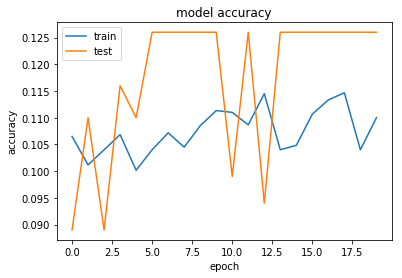

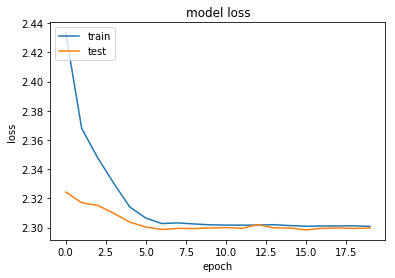

In [16]:
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Hyper-parameter: Learning-rate

In [20]:
from keras import optimizers

#### 0.1

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 5s 764us/step - loss: 2.1397 - acc: 0.2123 - val_loss: 1.7545 - val_acc: 0.3020
Epoch 2/20
6000/6000 [==============================] - 2s 251us/step - loss: 1.4429 - acc: 0.4547 - val_loss: 1.1248 - val_acc: 0.6050
Epoch 3/20
6000/6000 [==============================] - 1s 237us/step - loss: 0.9496 - acc: 0.6717 - val_loss: 0.7571 - val_acc: 0.7420
Epoch 4/20
6000/6000 [==============================] - 1s 235us/step - loss: 0.5546 - acc: 0.8183 - val_loss: 0.6285 - val_acc: 0.8130
Epoch 5/20
6000/6000 [==============================] - 1s 236us/step - loss: 0.4026 - acc: 0.8917 - val_loss: 0.4695 - val_acc: 0.8720
Epoch 6/20
6000/6000 [==============================] - 1s 236us/step - loss: 0.3107 - acc: 0.9208 - val_loss: 0.4603 - val_acc: 0.8860
Epoch 7/20
6000/6000 [==============================] - 1s 235us/step - loss: 0.2734 - acc: 0.9307 - val_loss: 0.3581 - val_acc: 0.9170


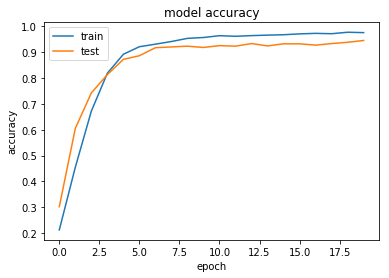

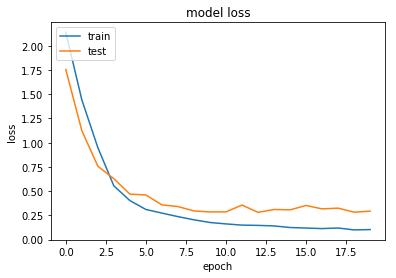

In [21]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 0.01

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 4s 704us/step - loss: 2.2990 - acc: 0.1188 - val_loss: 2.2866 - val_acc: 0.2650
Epoch 2/20
6000/6000 [==============================] - 1s 235us/step - loss: 2.2744 - acc: 0.1587 - val_loss: 2.2162 - val_acc: 0.3240
Epoch 3/20
6000/6000 [==============================] - 1s 239us/step - loss: 2.0972 - acc: 0.2832 - val_loss: 1.7835 - val_acc: 0.3830
Epoch 4/20
6000/6000 [==============================] - 1s 250us/step - loss: 1.5419 - acc: 0.4500 - val_loss: 1.1807 - val_acc: 0.5830
Epoch 5/20
6000/6000 [==============================] - 1s 240us/step - loss: 0.9756 - acc: 0.6672 - val_loss: 0.7482 - val_acc: 0.7570
Epoch 6/20
6000/6000 [==============================] - 1s 236us/step - loss: 0.6846 - acc: 0.7782 - val_loss: 0.5591 - val_acc: 0.8380
Epoch 7/20
6000/6000 [==============================] - 1s 235us/step - loss: 0.5149 - acc: 0.8432 - val_loss: 0.4469 - val_acc: 0.8680


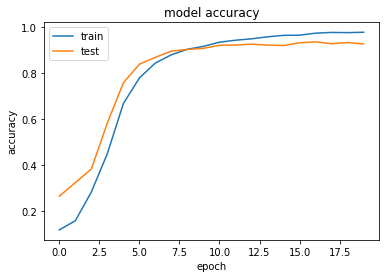

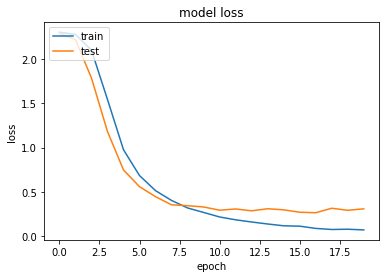

In [22]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 0.001

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 5s 757us/step - loss: 2.3035 - acc: 0.0992 - val_loss: 2.3010 - val_acc: 0.1120
Epoch 2/20
6000/6000 [==============================] - 1s 236us/step - loss: 2.3006 - acc: 0.1027 - val_loss: 2.2990 - val_acc: 0.1580
Epoch 3/20
6000/6000 [==============================] - 1s 237us/step - loss: 2.3007 - acc: 0.1015 - val_loss: 2.2969 - val_acc: 0.2230
Epoch 4/20
6000/6000 [==============================] - 1s 238us/step - loss: 2.2982 - acc: 0.1095 - val_loss: 2.2948 - val_acc: 0.2310
Epoch 5/20
6000/6000 [==============================] - 1s 238us/step - loss: 2.2950 - acc: 0.1325 - val_loss: 2.2924 - val_acc: 0.2600
Epoch 6/20
6000/6000 [==============================] - 1s 246us/step - loss: 2.2936 - acc: 0.1347 - val_loss: 2.2899 - val_acc: 0.2720
Epoch 7/20
6000/6000 [==============================] - 1s 239us/step - loss: 2.2919 - acc: 0.1367 - val_loss: 2.2869 - val_acc: 0.2840


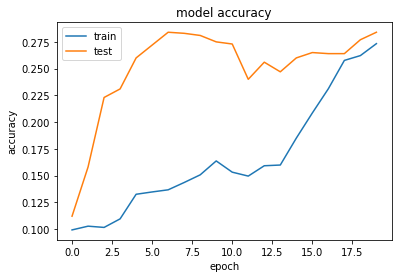

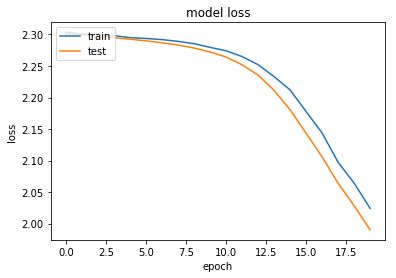

In [23]:
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Hyper-parameter: Momentum

#### 0.9

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 5s 845us/step - loss: 2.1370 - acc: 0.2228 - val_loss: 1.5047 - val_acc: 0.4210
Epoch 2/20
6000/6000 [==============================] - 1s 236us/step - loss: 1.3374 - acc: 0.5012 - val_loss: 1.0076 - val_acc: 0.6240
Epoch 3/20
6000/6000 [==============================] - 1s 244us/step - loss: 0.7224 - acc: 0.7620 - val_loss: 0.7236 - val_acc: 0.7840
Epoch 4/20
6000/6000 [==============================] - 1s 240us/step - loss: 0.4724 - acc: 0.8647 - val_loss: 0.4535 - val_acc: 0.8740
Epoch 5/20
6000/6000 [==============================] - 1s 243us/step - loss: 0.3386 - acc: 0.9082 - val_loss: 0.4215 - val_acc: 0.8980
Epoch 6/20
6000/6000 [==============================] - 1s 248us/step - loss: 0.2698 - acc: 0.9312 - val_loss: 0.3127 - val_acc: 0.9240
Epoch 7/20
6000/6000 [==============================] - 1s 236us/step - loss: 0.2383 - acc: 0.9413 - val_loss: 0.2917 - val_acc: 0.9210


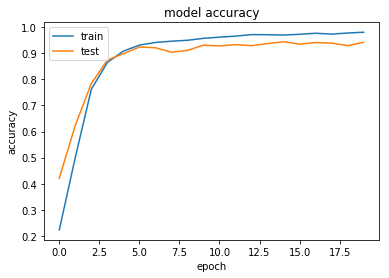

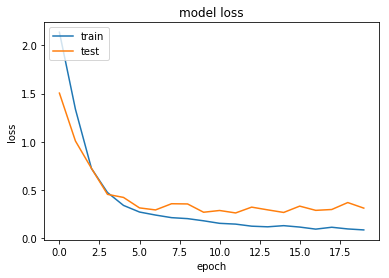

In [24]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 0.5

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 6s 933us/step - loss: 2.2804 - acc: 0.1362 - val_loss: 2.1647 - val_acc: 0.2300
Epoch 2/20
6000/6000 [==============================] - 1s 243us/step - loss: 1.9324 - acc: 0.3190 - val_loss: 1.3764 - val_acc: 0.4780
Epoch 3/20
6000/6000 [==============================] - 1s 243us/step - loss: 1.2008 - acc: 0.5540 - val_loss: 1.4260 - val_acc: 0.4220
Epoch 4/20
6000/6000 [==============================] - 1s 236us/step - loss: 0.7931 - acc: 0.7178 - val_loss: 0.5932 - val_acc: 0.8320
Epoch 5/20
6000/6000 [==============================] - 1s 237us/step - loss: 0.5479 - acc: 0.8285 - val_loss: 0.4288 - val_acc: 0.8740
Epoch 6/20
6000/6000 [==============================] - 1s 236us/step - loss: 0.5736 - acc: 0.8330 - val_loss: 0.5800 - val_acc: 0.8080
Epoch 7/20
6000/6000 [==============================] - 1s 243us/step - loss: 0.4521 - acc: 0.8518 - val_loss: 0.4253 - val_acc: 0.8930


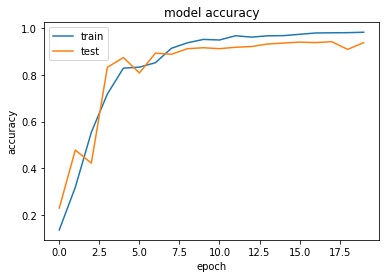

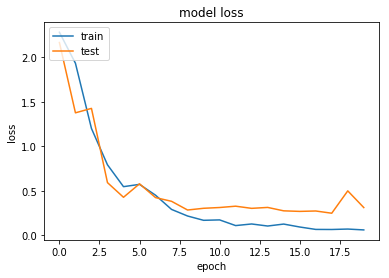

In [25]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.5, nesterov=True)


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 0.2

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 5s 810us/step - loss: 2.2953 - acc: 0.1262 - val_loss: 2.2756 - val_acc: 0.2810
Epoch 2/20
6000/6000 [==============================] - 1s 238us/step - loss: 2.2060 - acc: 0.1998 - val_loss: 1.9610 - val_acc: 0.3800
Epoch 3/20
6000/6000 [==============================] - 1s 240us/step - loss: 1.7551 - acc: 0.4063 - val_loss: 1.3083 - val_acc: 0.5210
Epoch 4/20
6000/6000 [==============================] - 1s 237us/step - loss: 1.1852 - acc: 0.5678 - val_loss: 1.4291 - val_acc: 0.5260
Epoch 5/20
6000/6000 [==============================] - 1s 239us/step - loss: 0.9292 - acc: 0.6742 - val_loss: 0.5905 - val_acc: 0.8140
Epoch 6/20
6000/6000 [==============================] - 1s 244us/step - loss: 0.6245 - acc: 0.7933 - val_loss: 0.4846 - val_acc: 0.8480
Epoch 7/20
6000/6000 [==============================] - 2s 252us/step - loss: 0.4942 - acc: 0.8418 - val_loss: 0.4234 - val_acc: 0.8720


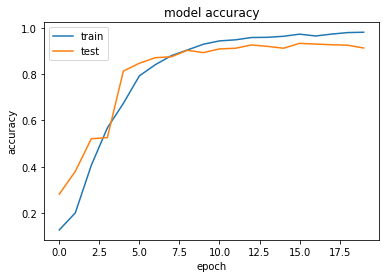

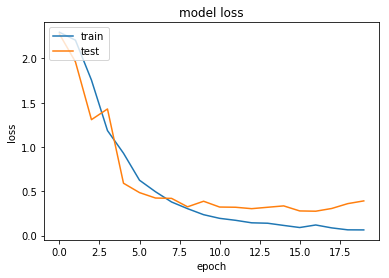

In [26]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.2, nesterov=True)


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Hyper-parameter: Initializer

#### Zeros

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 6s 999us/step - loss: 2.3023 - acc: 0.1097 - val_loss: 2.3009 - val_acc: 0.1260
Epoch 2/20
6000/6000 [==============================] - 1s 248us/step - loss: 2.3030 - acc: 0.1005 - val_loss: 2.2996 - val_acc: 0.1070
Epoch 3/20
6000/6000 [==============================] - 1s 248us/step - loss: 2.3026 - acc: 0.1075 - val_loss: 2.2978 - val_acc: 0.1260
Epoch 4/20
6000/6000 [==============================] - 2s 251us/step - loss: 2.3016 - acc: 0.1058 - val_loss: 2.2997 - val_acc: 0.1260
Epoch 5/20
6000/6000 [==============================] - 1s 242us/step - loss: 2.3018 - acc: 0.1093 - val_loss: 2.3011 - val_acc: 0.0990
Epoch 6/20
6000/6000 [==============================] - 1s 244us/step - loss: 2.3030 - acc: 0.0975 - val_loss: 2.3019 - val_acc: 0.1260
Epoch 7/20
6000/6000 [==============================] - 1s 239us/step - loss: 2.3025 - acc: 0.1015 - val_loss: 2.3001 - val_acc: 0.1260


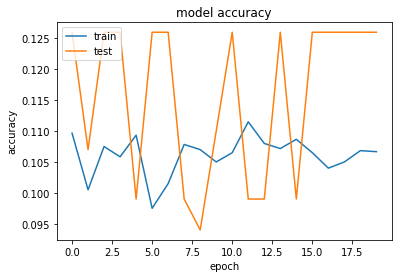

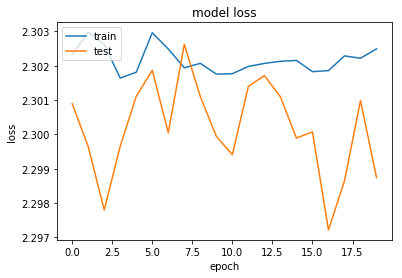

In [27]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer='zeros'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### random normal

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 6s 1ms/step - loss: 2.0486 - acc: 0.2407 - val_loss: 2.1267 - val_acc: 0.2020
Epoch 2/20
6000/6000 [==============================] - 1s 240us/step - loss: 1.3464 - acc: 0.5357 - val_loss: 1.2560 - val_acc: 0.6020
Epoch 3/20
6000/6000 [==============================] - 1s 244us/step - loss: 0.7026 - acc: 0.7833 - val_loss: 0.6358 - val_acc: 0.8080
Epoch 4/20
6000/6000 [==============================] - 1s 241us/step - loss: 0.4132 - acc: 0.8890 - val_loss: 0.4725 - val_acc: 0.8700
Epoch 5/20
6000/6000 [==============================] - 2s 266us/step - loss: 0.3039 - acc: 0.9203 - val_loss: 0.3597 - val_acc: 0.9090
Epoch 6/20
6000/6000 [==============================] - 2s 259us/step - loss: 0.2787 - acc: 0.9273 - val_loss: 0.4710 - val_acc: 0.8930
Epoch 7/20
6000/6000 [==============================] - ETA: 0s - loss: 0.2616 - acc: 0.935 - 2s 261us/step - loss: 0.2667 - acc: 0.9345 -

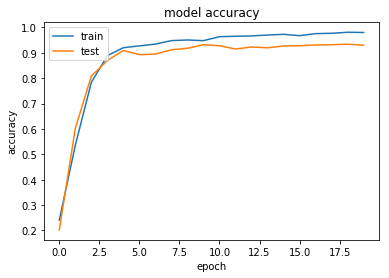

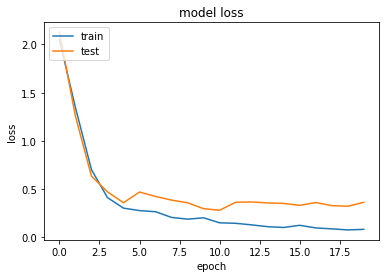

In [28]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer='random_normal'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### glorot uniform

Train on 6000 samples, validate on 1000 samples
Epoch 1/20
6000/6000 [==============================] - 6s 1ms/step - loss: 2.0889 - acc: 0.2333 - val_loss: 1.5264 - val_acc: 0.4670
Epoch 2/20
6000/6000 [==============================] - 2s 285us/step - loss: 1.1438 - acc: 0.6040 - val_loss: 0.8680 - val_acc: 0.7550
Epoch 3/20
6000/6000 [==============================] - 2s 254us/step - loss: 0.5693 - acc: 0.8213 - val_loss: 0.6381 - val_acc: 0.8180
Epoch 4/20
6000/6000 [==============================] - 2s 268us/step - loss: 0.4541 - acc: 0.8782 - val_loss: 0.4066 - val_acc: 0.9020
Epoch 5/20
6000/6000 [==============================] - 2s 263us/step - loss: 0.3233 - acc: 0.9135 - val_loss: 0.4114 - val_acc: 0.8860
Epoch 6/20
6000/6000 [==============================] - 2s 253us/step - loss: 0.2987 - acc: 0.9250 - val_loss: 0.3896 - val_acc: 0.9010
Epoch 7/20
6000/6000 [==============================] - 2s 258us/step - loss: 0.2211 - acc: 0.9435 - val_loss: 0.3385 - val_acc: 0.9100
Ep

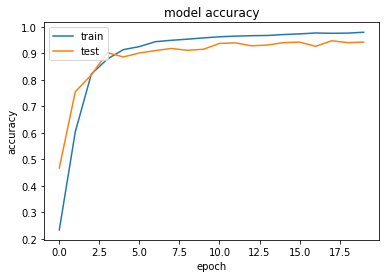

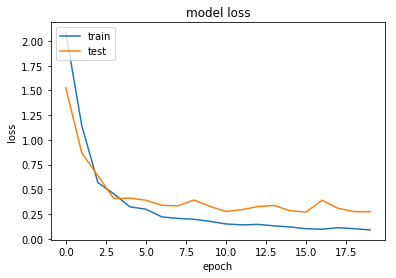

In [29]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer=keras.initializers.glorot_uniform(seed=None)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()